##### import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Problem Statement and Business Case

In [1]:
# NLP (Natural Language Processing) works by converting words (texts) into numbers 
# These numbers are then used to train the Machine Learning Models to make Predictions
# This AI/ML model is crucial for companies to detect their customer reviews fast and efficiently
# The dataset contains 1000's of tweets and detects tweet as positive (1) or negative (0)

# Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # Natural Language tool kit 

In [3]:
# Load the data
data=pd.read_csv('../input/twitter-analysis-dataset-2022/twitter.csv')

In [4]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [7]:
tweets_df=data

# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

# Exploring Dataset

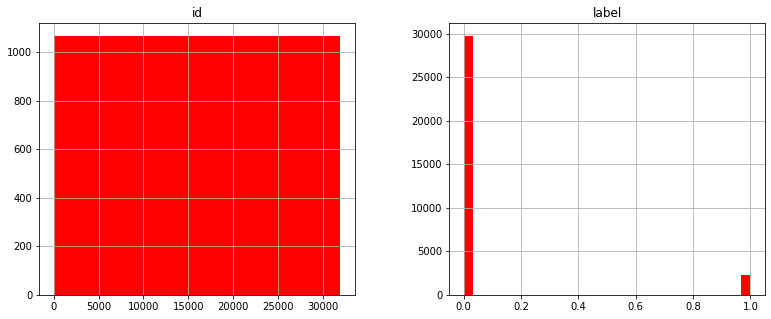

In [8]:
data.hist(bins = 30, figsize = (13,5), color = 'r')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


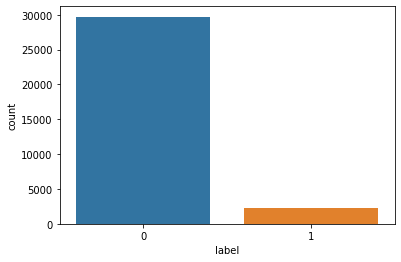

In [9]:
sns.countplot(tweets_df['label'], label = "Count") 
plt.show()

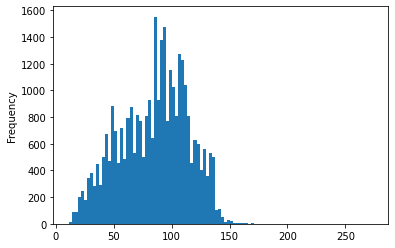

In [10]:
# Let's get the length of the messages
tweets_df['length']=tweets_df['tweet'].apply(len)

tweets_df['length'].plot(bins=100, kind='hist') 
plt.show()

In [11]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [12]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [13]:
# Let's see the message with mean length 
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [14]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [15]:
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [16]:
negative.iloc[1].tweet

'no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins'

# Perform Data Cleaning-I (Remove Punctuations)

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'
Test_punc_removed=[char for char in Test if char not in string.punctuation]

# Join the characters again to form the string.
Test_punc_removed_join=' '.join(Test_punc_removed)
Test_punc_removed_join

'G o o d   m o r n i n g   b e a u t i f u l   p e o p l e     I   a m   h a v i n g   f u n   l e a r n i n g   M a c h i n e   l e a r n i n g   a n d   A I'

In [19]:
Test_punc_removed = []
for char in Test: 
    if char not in string.punctuation:
        Test_punc_removed.append(char)
        
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# Perform Data Cleaning-II (Remove Stop Words)

In [20]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split()  if word.lower() not in stopwords.words('english')]

Test_punc_removed_join_clean # Only important (no so common) words are left

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [22]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

challege = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 

# Perform Count Vectorization (Tokenization)

In [23]:
#### Tokenization is the process of converting words into numbers to represent it in the form of vector 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer= CountVectorizer()
X=vectorizer.fit_transform(sample_data)

In [25]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [26]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [27]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


# Creating a Pipeline to Remove Punctuations, Stop words & Perform Tokenization

In [28]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [29]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [30]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [32]:
vectorizer.get_feature_names()

['0',
 '0000001',
 '00027',
 '001',
 '0035',
 '00h30',
 '01',
 '0115',
 '0161',
 '019',
 '01926889917',
 '02',
 '0265',
 '0266808099',
 '02900',
 '03',
 '030916',
 '03111880779',
 '032',
 '033',
 '0345',
 '039',
 '04',
 '045',
 '04k',
 '05',
 '0506823156',
 '06',
 '06052016',
 '0606',
 '060616',
 '0608',
 '0608wed',
 '0609',
 '0610',
 '061116',
 '0612',
 '0613',
 '0616',
 '0617',
 '0618',
 '0618saturday7monthscouple',
 '0618â\x99¡',
 '0620',
 '06202016',
 '0622',
 '0624',
 '06Â',
 '07',
 '07000',
 '07040',
 '07044',
 '07150',
 '07190',
 '07400',
 '07468',
 '07500',
 '076',
 '07788427999',
 '07800',
 '07840',
 '07850',
 '07870',
 '07900',
 '07930',
 '07950',
 '08',
 '0806',
 '080616',
 '088b',
 '08â\x80¦',
 '09',
 '09062016',
 '0933m',
 '09600',
 '0k',
 '0shares',
 '0tolerancemovie',
 '0ð\x9f\x98¥â\x98¹ï¸\x8f',
 '1',
 '10',
 '100',
 '1000',
 '100000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1000yr',
 '1000â\x82¬',
 '1001',
 '1001000s',
 '10014',
 '10021',
 '10025',
 '10

In [33]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
tweets_countvectorizer.shape

(31962, 47386)

In [35]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())

X = tweets

X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y = tweets_df['label']

# Working of Naive Bayes Theoram

In [37]:
# Naive Bayes is a classification technique based on bayes theoram
# The theoram works on conditional Probability and Mathematics

# PRIOR PROBABILITY --> Probability of assuming before, performing the experiment.
# LIKLIHOOD PROBABILITY --> Probability of assuming while performing the experiment.
# POSTERIOR PROBABILITY --> Probability by combining both prior and liklihood probability.

# Formula of Naive Bayes Theoram:
#    P(A|B) = (P(B|A) * p(A)) / P(B)

# Training the Model

In [38]:
print(X.shape)

print(y.shape)

(31962, 47386)
(31962,)


In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Define oversampling strategy
oversampler = RandomOverSampler(sampling_strategy='minority')

# Perform oversampling on the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

0    29720
1    29720
Name: label, dtype: int64


In [40]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

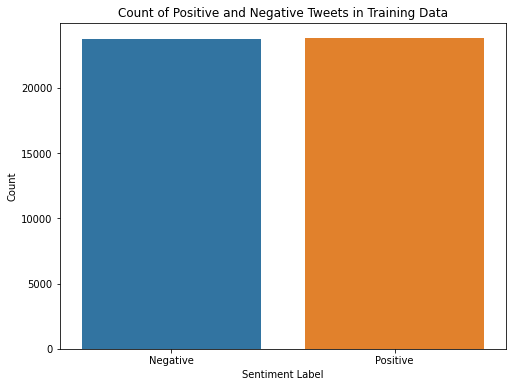

In [41]:
import seaborn as sns

# Concatenate the training data for visualization
train_data_resampled = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=['label'])], axis=1)

# Plot the countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data_resampled, x='label')
plt.title('Count of Positive and Negative Tweets in Training Data')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

# Assess the Model Performance using Confusion Matrix

In [42]:
# Confusion Matrix --> Compares true value with predicted value 

<AxesSubplot:>

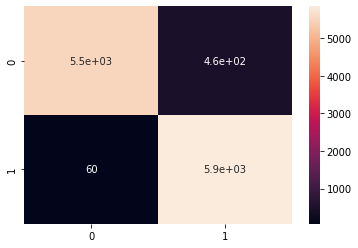

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      5977
           1       0.93      0.99      0.96      5911

    accuracy                           0.96     11888
   macro avg       0.96      0.96      0.96     11888
weighted avg       0.96      0.96      0.96     11888



# Thank You for Visiting my Notebook

In [45]:
# Step 1: Preprocess the Input Tweet
def preprocess_tweet(tweet):
    cleaned_tweet = message_cleaning(tweet)  # Using the same cleaning pipeline
    return ' '.join(cleaned_tweet)  # Join the cleaned tokens back into a single string

# Step 2: Vectorize the Processed Tweet
def vectorize_tweet(tweet):
    cleaned_tweet = preprocess_tweet(tweet)
    tweet_vector = vectorizer.transform([cleaned_tweet])  # Use the trained CountVectorizer
    return tweet_vector

# Step 3: Make Prediction
def predict_sentiment(tweet):
    tweet_vector = vectorize_tweet(tweet)
    prediction = NB_classifier.predict(tweet_vector)
    if prediction == 0:
        return "Positive"
    else:
        return "Negative"

# Example Usage
input_tweet = "I love this movie, it's amazing!"
prediction = predict_sentiment(input_tweet)
print("Prediction:", prediction)
input_tweet2 = "no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins"
prediction2 = predict_sentiment(input_tweet2)
print("Prediction:", prediction2)
input_tweet3 = "poor performance,no comment"
prediction3 = predict_sentiment(input_tweet3)
print("Prediction:", prediction3)

Prediction: Positive
Prediction: Negative
Prediction: Negative
